In [140]:
import numpy as np
import matplotlib.pyplot as plt

In [141]:
k = np.linspace(0,1000,num=10000)
N = 1000
P = k/N

In [142]:
P

array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00])

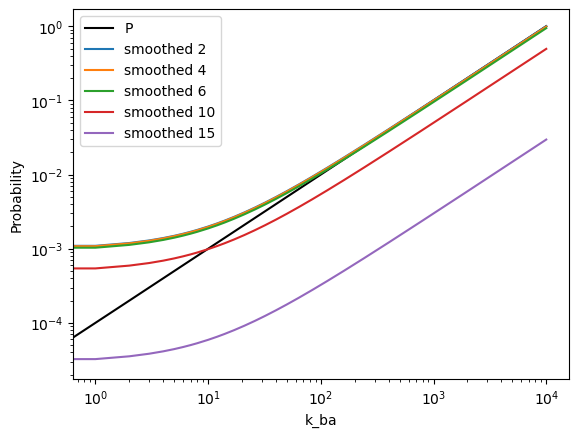

In [143]:
plt.loglog(P, color="black", label="P")

for r in [2,4,6,10,15]:
    P_s = (k+1)/(N+2**r)
    plt.loglog(P_s, label=f"smoothed {r}")
plt.xlabel("k_ba")
plt.ylabel("Probability")
plt.legend()
plt.show()

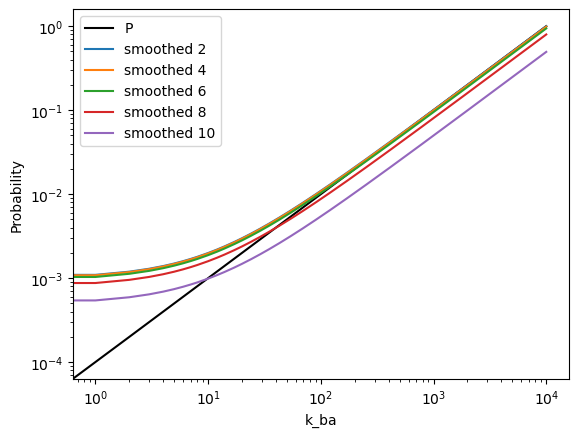

In [144]:
plt.loglog(P, color="black", label="P")

for r in [2,4,6,8,10]:
    P_s = (k+1)/(N+2**r)
    plt.loglog(P_s, label=f"smoothed {r}")
plt.xlabel("k_ba")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [145]:
P_s(K, R,N)

TypeError: 'numpy.ndarray' object is not callable

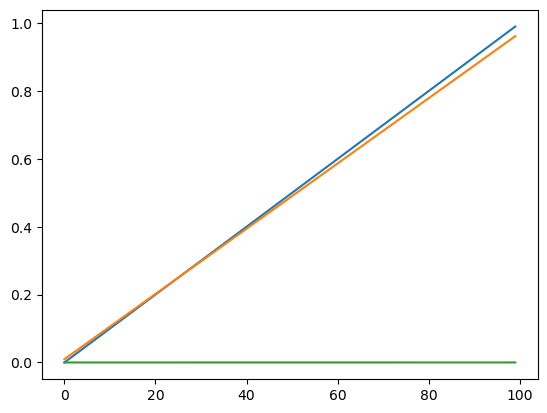

In [ ]:
ks = np.arange(100)
plt.plot(ks,P(ks, 10,100))
plt.plot(ks, P_s(ks,2,100))
plt.plot(ks, P_s(ks,20,100))


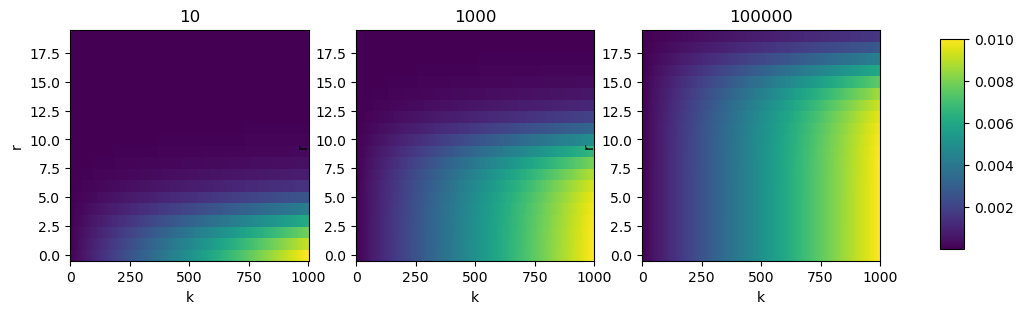

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as plticker
from matplotlib.colors import LogNorm



# Define the function
N = 1000

def P_s(k, r,N):
    return (k + 1) / (N + 2**r)
def P(k,r,N):
    return k/N

# Generate values for k and r
k = np.linspace(0, N, 1000)
r = np.arange(0, 20)

K, R = np.meshgrid(k, r)




fig, axs = plt.subplots(1,3,figsize=(12, 3))

for i,N in enumerate([10,1000,100_000]):
    # Z = P(K,R,N) - P_s(K, R,N)
    Z = P_s(K,R,N)

    ax = axs[i]
    
    # im = sns.heatmap(Z, cmap='viridis', ax=ax, cbar=False)
    im = ax.pcolor(K, R, Z)
    ax.set_ylabel("r")
    ax.set_xlabel("k")
    ax.set_title(N)





fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
# fig.colorbar(axs[2].collections[0], ax=axs[2], label="Unsmoothed - smoothed")



plt.show()

set alpha = 1/2^r s.t. it always is N+1 in the denominator

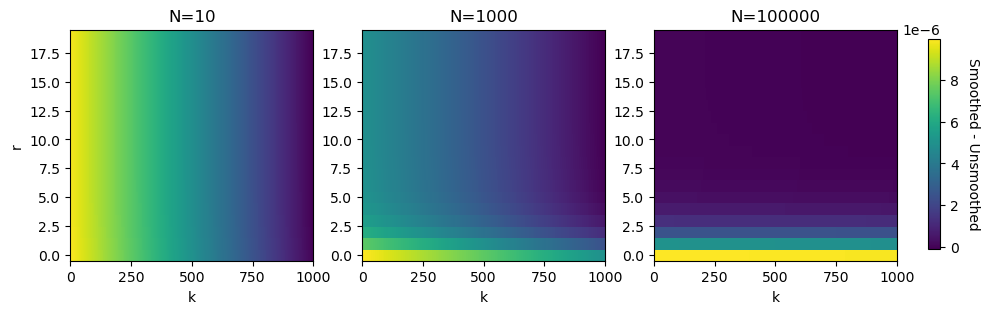

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as plticker
from matplotlib.colors import LogNorm



# Define the function
N = 1000

def P_s(k, r,N):
    return (k + (1/2**r)) / (N + 1) # (1/2**r)*(2**r) = 1

def P(k,r,N):
    return k/N

# Generate values for k and r
k = np.linspace(0, N, 1000)
r = np.arange(0, 20)

K, R = np.meshgrid(k, r)

fig, axs = plt.subplots(1,3,figsize=(12, 3))

for i,N in enumerate([10,1000,100_000]):
    Z = P_s(K, R,N) - P(K,R,N)
    
    # Z = P_s(K,R,N)

    ax = axs[i]
    
    # im = sns.heatmap(Z, cmap='viridis', ax=ax, cbar=False)
    im = ax.pcolor(K, R, Z, cmap="viridis")
    if i == 0:
        ax.set_ylabel("r")
    ax.set_xlabel("k")
    ax.set_title("N="+str(N))





fig.subplots_adjust(right=0.814)
cbar_ax = fig.add_axes([0.84, 0.15, 0.01, 0.7])

cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_ylabel("Smoothed - Unsmoothed", rotation=270, labelpad=15)

# fig.colorbar(axs[2].collections[0], ax=axs[2], label="Unsmoothed - smoothed")

plt.show()

In [192]:
Z[18, 800]

8.004113269573232e-08

In [150]:
P_s(k, r,N)

ValueError: operands could not be broadcast together with shapes (1000,) (20,) 

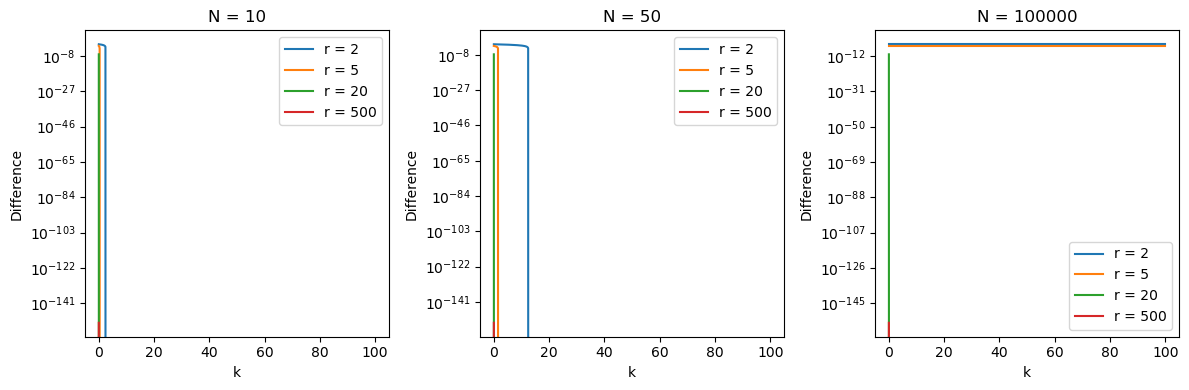

In [180]:

def P_s(k, r,N):
    return (k + (1/2**r)) / (N + 1) # (1/2**r)*(2**r) = 1

def P(k,r,N):
    return k/N

import matplotlib.pyplot as plt

# Generate values for k

# Define the values for r
r_values = [2,5, 20, 500]
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
N_values = [10, 50,100000]
# Iterate over the subplots
for i, ax in enumerate(axs):
    # Iterate over the r values
    for r in r_values:
        k = np.linspace(0, N, 1000)

        # Calculate the values for P and P_s
        P_values = P(k, r, N_values[i])
        P_s_values = P_s(k, r, N_values[i])

        # Plot the lines
        # ax.semilogy(k, P_values, label=f'r = {r} ns')
        # ax.semilogy(k, P_s_values, label=f'r = {r}')
        ax.semilogy(k, P_s_values - P_values, label=f'r = {r}')

    
    # Set the title and labels for each subplot
    ax.set_title(f'N = {N_values[i]}')
    ax.set_xlabel('k')
    ax.set_ylabel('Difference')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [163]:
P_s_values

array([2.77721488e-152, 9.10000910e+000, 1.82000182e+001, 2.73000273e+001,
       3.64000364e+001, 4.55000455e+001, 5.46000546e+001, 6.37000637e+001,
       7.28000728e+001, 8.19000819e+001, 9.10000910e+001, 1.00100100e+002,
       1.09200109e+002, 1.18300118e+002, 1.27400127e+002, 1.36500137e+002,
       1.45600146e+002, 1.54700155e+002, 1.63800164e+002, 1.72900173e+002,
       1.82000182e+002, 1.91100191e+002, 2.00200200e+002, 2.09300209e+002,
       2.18400218e+002, 2.27500228e+002, 2.36600237e+002, 2.45700246e+002,
       2.54800255e+002, 2.63900264e+002, 2.73000273e+002, 2.82100282e+002,
       2.91200291e+002, 3.00300300e+002, 3.09400309e+002, 3.18500319e+002,
       3.27600328e+002, 3.36700337e+002, 3.45800346e+002, 3.54900355e+002,
       3.64000364e+002, 3.73100373e+002, 3.82200382e+002, 3.91300391e+002,
       4.00400400e+002, 4.09500410e+002, 4.18600419e+002, 4.27700428e+002,
       4.36800437e+002, 4.45900446e+002, 4.55000455e+002, 4.64100464e+002,
       4.73200473e+002, 4